# Supervised learning methods

In [1]:
#importing neccesary lib
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
#importing datasets
df = pd.DataFrame()

In [3]:
filename = 'winequality-white.csv'

In [4]:
df_white = pd.read_csv(filename , delimiter=';')

In [5]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df_white['type'] = '0'

In [7]:
df_white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,0


In [8]:
df_red = pd.DataFrame()

In [9]:
filename = 'winequality-red.csv'

In [10]:
df_red = pd.read_csv(filename , delimiter=';')

In [11]:
df_red['type'] = '1'

In [12]:
df_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [13]:
#merging the two wine datasets
df = pd.concat([df_white , df_red])

In [14]:
#shuffling the rows so that the datasets row will have mix of red and white wine rows
df = df.sample(frac = 1,random_state= 10).reset_index(drop = True)

In [15]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,1
1,6.6,0.42,0.13,12.8,0.044,26.0,158.0,0.99772,3.24,0.47,9.0,5,0
2,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,1
3,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,1
4,6.6,0.19,0.99,1.2,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6,0


In [16]:
names = df.columns

In [17]:
df.shape

(6497, 13)

In [18]:
df.isnull().values.any()

False

# Use regression to predict the alcohol level of the wine.

In [19]:
#x is the input features
x = np.array(df.drop(['alcohol'],1))

In [20]:
#y is the target 
y = np.array(df['alcohol'])

In [21]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [23]:
#Data pre processing scaling input features x
scaler = preprocessing.StandardScaler().fit(x)

In [24]:
x = scaler.transform(x)

# 1. Lasso regression

In [25]:
#Linear least squares with l1 regularization.

#testing for default value of alpha
reg_lasso1 = Lasso(max_iter=100000)
reg_lasso1.fit(X_train, y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
pred_lasso1 = reg_lasso1.predict(X_test)
training_default = reg_lasso1.score(X_train,y_train)
testing_default = reg_lasso1.score(X_test,y_test)

In [27]:
print('the training score for default alpha is :%.2f' %training_default)
print('the testing score for default alpha is :%.2f' %testing_default)

the training score for default alpha is :0.11
the testing score for default alpha is :0.10


In [28]:
#Perform some manual optimization of the parameters (at least 5 different values for the parameter)
training_score =[]
testing_score = [] 
alpha = (0.0001,0.001,0.01,0.1,100)
for i in alpha:
    reg_lasso = Lasso(alpha=i,max_iter=100000)
    reg_lasso.fit(X_train, y_train)
    pred_lasso = reg_lasso.predict(X_test)
    training_score.append(reg_lasso.score(X_train,y_train))
    testing_score.append(reg_lasso.score(X_test,y_test))

In [29]:
list(zip(alpha,testing_score))

[(0.0001, 0.7784906339463094),
 (0.001, 0.41204921328295074),
 (0.01, 0.3645536155704297),
 (0.1, 0.31310457231417355),
 (100, -4.980317805425294e-05)]

In [30]:
import matplotlib.pyplot as plt

Text(0.5,1,'Accuracy vs alpha plot for Lasso regression')

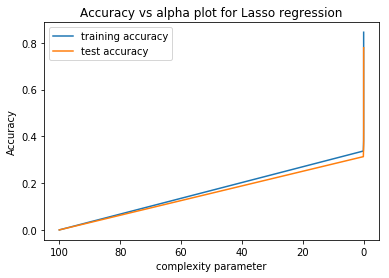

In [31]:
#plot the new obtained accuracy as a function of the chosen parameter
#plt.figure(figsize=(10,12))
plt.plot(alpha, training_score, label="training accuracy")
plt.plot(alpha, testing_score, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("complexity parameter")
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs alpha plot for Lasso regression')

In [32]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train).coef_
print('number of features used with alpha = 0.0001 is', np.sum(lasso00001!=0))
lasso0001 = Lasso(alpha=0.001,max_iter=100000).fit(X_train,y_train).coef_
print('number of features used with alpha = 0.001 is', np.sum(lasso0001!=0))
lasso01 = Lasso(alpha=0.1,max_iter=100000).fit(X_train,y_train).coef_
print('number of features used with alpha = 0.1 is', np.sum(lasso01!=0))

number of features used with alpha = 0.0001 is 12
number of features used with alpha = 0.001 is 11
number of features used with alpha = 0.1 is 5


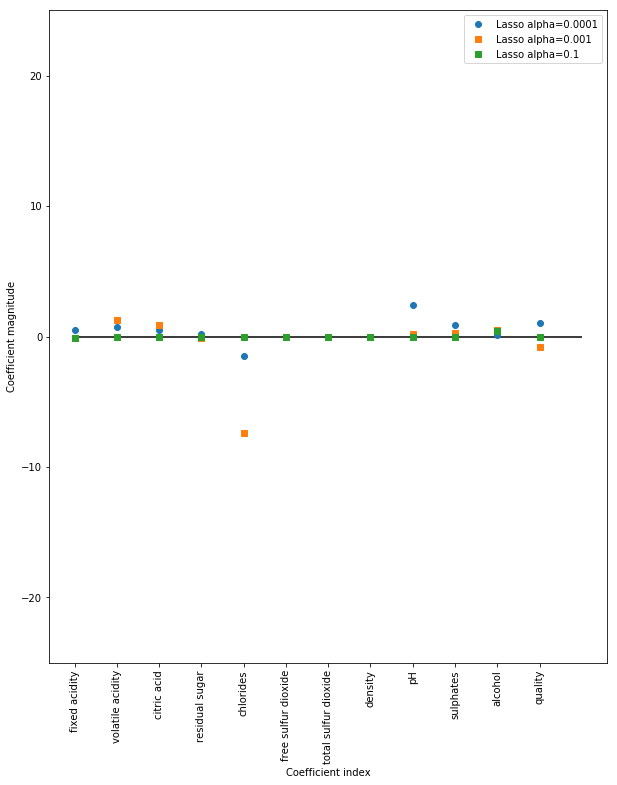

In [33]:
#plotting the coefficient of magitudes for lasso
names = df.columns.values
plt.figure(figsize=(10,12))
plt.plot(lasso00001, 'o', label="Lasso alpha=0.0001")
plt.plot(lasso0001, 's', label="Lasso alpha=0.001")
plt.plot(lasso01, 's', label="Lasso alpha=0.1")
plt.xticks(range(len(names)-1), names, rotation=90)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lasso0001))
plt.ylim(-25, 25)
plt.legend()

# 2.ElasticNet regression

In [34]:
#training the model
reg_elst = ElasticNet(random_state=0)
reg_elst.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
#report accuracy with the default parameters
pred = reg_elst.predict(X_test)
test_default = reg_elst.score(X_test, y_test)
train_default = reg_elst.score(X_train,y_train)
print('the test accuracy for default alpha and l1ratio is :%.2f' %test_default)
print('the train accuracy for default alpha and l1ratio is :%.2f' %train_default)

the test accuracy for default alpha and l1ratio is :0.12
the train accuracy for default alpha and l1ratio is :0.14


In [36]:
#Perform some manual optimization of the parameters : parameter 1 --> alpha
training_score1 =[]
testing_score1 = []
alpha = (0.0001,0.001,0.1,0.5,10)
for i in alpha:
    reg_elst = ElasticNet(alpha=i, random_state=0)
    reg_elst.fit(X_train, y_train)
    pred_elst = reg_elst.predict(X_test)
    training_score1.append(reg_elst.score(X_train,y_train))
    testing_score1.append(reg_elst.score(X_test,y_test))

In [37]:
list(zip(alpha,testing_score1))

[(0.0001, 0.4304821240161314),
 (0.001, 0.41133527342720677),
 (0.1, 0.33101070889686),
 (0.5, 0.22297367930031306),
 (10, 0.06158430530994985)]

Text(0.5,1,'Accuracy vs alpha plot for ElasticNet regression')

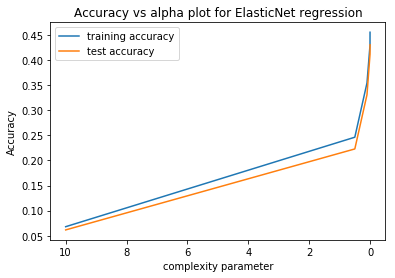

In [38]:
#plot the new obtained accuracy as a function of the chosen parameter
plt.plot(alpha, training_score1, label="training accuracy")
plt.plot(alpha, testing_score1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("complexity parameter")
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs alpha plot for ElasticNet regression')

In [39]:
#Perform some manual optimization of the parameters : parameter 2 ---> l1_ratio
training_score2 =[]
testing_score2 = []
l1_ratio = (0.0005,0.005,0.05,1.0,2.0)
for i in l1_ratio:
    reg_elst = ElasticNet(random_state=0, l1_ratio = i)
    reg_elst.fit(X_train, y_train)
    pred_elst = reg_elst.predict(X_test)
    training_score2.append(reg_elst.score(X_train,y_train))
    testing_score2.append(reg_elst.score(X_test,y_test))

In [40]:
list(zip(l1_ratio,testing_score2))

[(0.0005, 0.27147986991140893),
 (0.005, 0.2700931584044618),
 (0.05, 0.25746466563555537),
 (1.0, 0.09668509397129077),
 (2.0, 0.06467789291378567)]

Text(0.5,1,'Accuracy vs l1 ratio plot for ElasticNet regression')

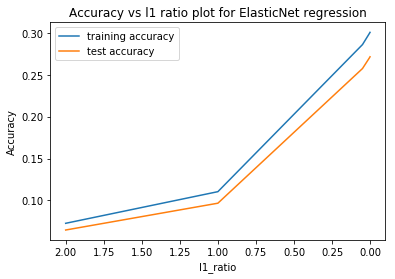

In [41]:
#plot the new obtained accuracy as a function of the chosen parameter
plt.plot(l1_ratio, training_score2, label="training accuracy")
plt.plot(l1_ratio, testing_score2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("l1_ratio")
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs l1 ratio plot for ElasticNet regression')

In [42]:
elst00001 = ElasticNet(alpha=0.0001,random_state=0).fit(X_train,y_train).coef_
print('number of features used with alpha = 0.0001 is', np.sum(elst00001!=0))
elst0001 = ElasticNet(alpha=0.001,random_state=0).fit(X_train,y_train).coef_
print('number of features used with alpha = 0.001 is', np.sum(elst0001!=0))
elst01 = ElasticNet(alpha=0.1,random_state=0).fit(X_train,y_train).coef_
print('number of features used with alpha = 0.1 is', np.sum(elst01!=0))

number of features used with alpha = 0.0001 is 12
number of features used with alpha = 0.001 is 12
number of features used with alpha = 0.1 is 6


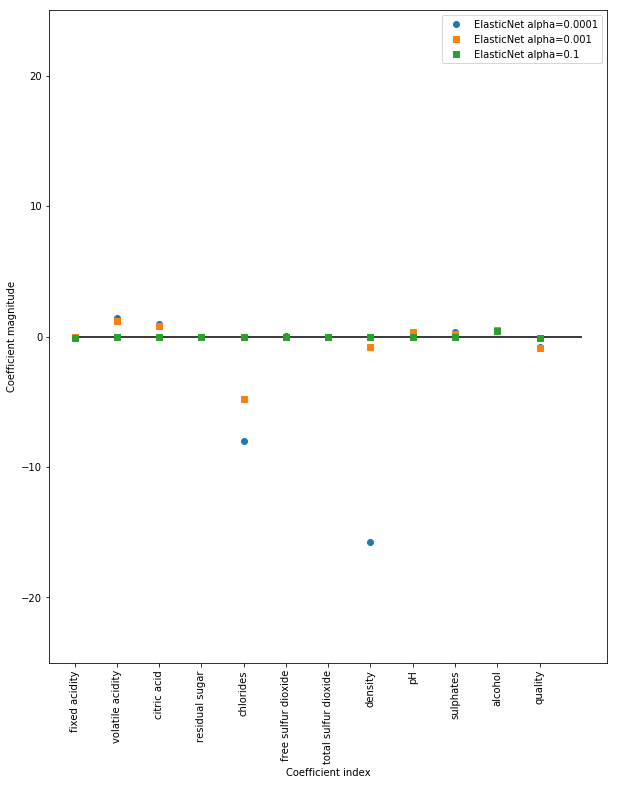

In [43]:
#plotting the coefficient of magnitudes for ElasticNet
names = df.columns.values
plt.figure(figsize=(10,12))
plt.plot(elst00001, 'o', label="ElasticNet alpha=0.0001")
plt.plot(elst0001, 's', label="ElasticNet alpha=0.001")
plt.plot(elst01, 's', label="ElasticNet alpha=0.1")
plt.xticks(range(len(names)-1), names, rotation=90)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(elst0001))
plt.ylim(-25, 25)
plt.legend()

# Use binary classification to predict the type of wine.

In [44]:
#Here the red wine = 1 and white wine = 0. Using binary classification, we are going to predict the wine type(whether 0 or 1)
x = np.array(df.drop(['type'],1))
y = np.array(df['type'])

# 1. LogisticRegression

In [45]:
#training the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
clf_logreg = LogisticRegression().fit(X_train, y_train)

In [46]:
clf_logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
#testing for default value of C
pred_logreg = clf_logreg.predict(X_test)
print('the test accuracy for default C parameter is :%.2f' %clf_logreg.score(X_test,y_test))
print('the train accuracy for default C parameter is :%.2f' %clf_logreg.score(X_train,y_train))
print('number of miplaced points:', np.sum(y_test != pred_logreg))

the test accuracy for default C parameter is :0.98
the train accuracy for default C parameter is :0.98
number of miplaced points: 28


In [48]:
#Perform some manual optimization of the parameters ---> with l2 penalty
training_score3 =[]
testing_score3 = []
C = (0.0001,0.001,0.01,10,100)
for i in C:
    clf_logreg = LogisticRegression(C = i).fit(X_train, y_train)
    pred_logreg = clf_logreg.predict(X_test)
    training_score3.append(clf_logreg.score(X_train,y_train))
    testing_score3.append(clf_logreg.score(X_test,y_test))

In [49]:
print('Test scores:' ,list(zip(C,testing_score3)),'\nTrain scores:', list(zip(C,training_score3)))

Test scores: [(0.0001, 0.924923076923077), (0.001, 0.9347692307692308), (0.01, 0.9501538461538461), (10, 0.9852307692307692), (100, 0.9876923076923076)] 
Train scores: [(0.0001, 0.93123973727422), (0.001, 0.9423234811165846), (0.01, 0.9501231527093597), (10, 0.9870689655172413), (100, 0.9883004926108374)]


Text(0.5,1,'Accuracy vs C plot for LogisticRegression classification(L2 penalty)')

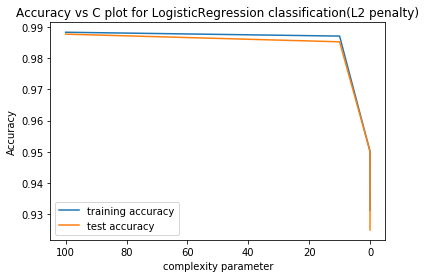

In [50]:
#plot the new obtained accuracy as a function of the chosen parameter
plt.plot(C, training_score3, label="training accuracy")
plt.plot(C, testing_score3, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("complexity parameter")
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs C plot for LogisticRegression classification(L2 penalty)')

In [51]:
#Perform some manual optimization of the parameters (at least 5 different values for the parameter)--> for l1 penalty
training_score4 =[]
testing_score4 = []
C = (0.0001,0.001,0.01,10,100)
for i in C:
    clf_logreg = LogisticRegression(C = i, penalty='l1').fit(X_train, y_train)
    pred_logreg = clf_logreg.predict(X_test)
    training_score4.append(clf_logreg.score(X_train,y_train))
    testing_score4.append(clf_logreg.score(X_test,y_test))

In [52]:
print('Test scores:' ,list(zip(C,testing_score4)),'\nTrain scores:', list(zip(C,training_score4)))

Test scores: [(0.0001, 0.7507692307692307), (0.001, 0.9304615384615385), (0.01, 0.939076923076923), (10, 0.9889230769230769), (100, 0.9895384615384616)] 
Train scores: [(0.0001, 0.7549261083743842), (0.001, 0.9326765188834154), (0.01, 0.9415024630541872), (10, 0.9883004926108374), (100, 0.9885057471264368)]


Text(0.5,1,'Accuracy vs C plot for LogisticRegression classification(L1 penalty)')

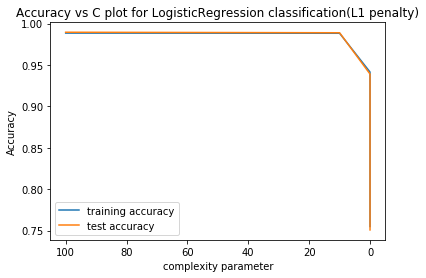

In [53]:
#plot the new obtained accuracy as a function of the chosen parameter
plt.plot(C, training_score4, label="training accuracy")
plt.plot(C, testing_score4, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("complexity parameter")
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs C plot for LogisticRegression classification(L1 penalty)')

Text(0,0.5,'Feature')

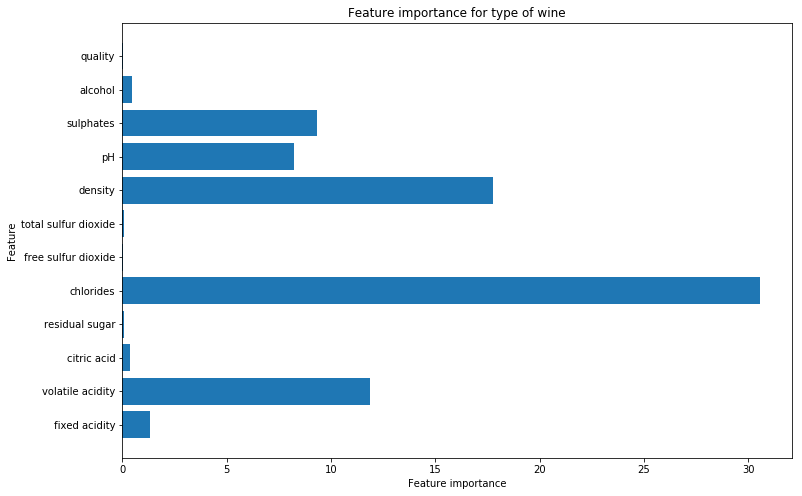

In [54]:
#plotting the feature importance for logisticRegression --> with  C = 100 and for l1 penalty
n_features = x.shape[1]
new_names =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
clf =  LogisticRegression(C = 100, penalty='l1').fit(X_train, y_train)
coefs = np.abs(clf.coef_[0])
#highest = np.argsort(coefs)
plt.figure(figsize = (12,8))
plt.barh(range(n_features), coefs, align='center')
plt.yticks(np.arange(n_features), new_names)
plt.title('Feature importance for type of wine')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

# 2. Linear SVC classification

In [55]:
from sklearn.svm import LinearSVC

In [56]:
#training the model
clf_lsvc = LinearSVC(random_state=0).fit(X_train, y_train)
clf_lsvc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [57]:
#testing for default value of C
pred_lsvc = clf_lsvc.predict(X_test)
print('the test accuracy for default C parameter is :%.2f' %clf_lsvc.score(X_test,y_test))
print('the train accuracy for default C parameter is :%.2f' %clf_lsvc.score(X_train,y_train))
print('number of miplaced points:', np.sum(y_test != pred_lsvc))

the test accuracy for default C parameter is :0.98
the train accuracy for default C parameter is :0.98
number of miplaced points: 35


In [58]:
#Perform some manual optimization of the parameters
training_score5 =[]
testing_score5 = []
C = (0.0001,0.001,0.01,10,100)
for i in C:
    clf_lsvc = LinearSVC(C=i,random_state=0).fit(X_train, y_train)
    pred_lsvc = clf_lsvc.predict(X_test)
    training_score5.append(clf_lsvc.score(X_train,y_train))
    testing_score5.append(clf_lsvc.score(X_test,y_test))

In [59]:
print('Test scores:' ,list(zip(C,testing_score5)),'\nTrain scores:', list(zip(C,training_score5)))

Test scores: [(0.0001, 0.9378461538461539), (0.001, 0.952), (0.01, 0.9747692307692307), (10, 0.9803076923076923), (100, 0.9686153846153847)] 
Train scores: [(0.0001, 0.9439655172413793), (0.001, 0.9523809523809523), (0.01, 0.9714696223316913), (10, 0.9807060755336617), (100, 0.9649014778325123)]


Text(0.5,1,'Accuracy vs C plot for LinearSVC classification(L2 penalty)')

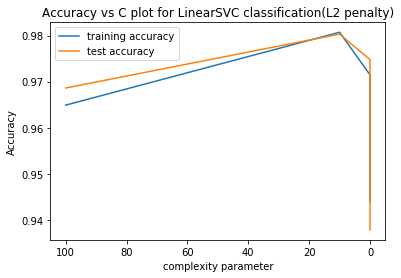

In [60]:
#plot the new obtained accuracy as a function of the chosen parameter
plt.plot(C, training_score5, label="training accuracy")
plt.plot(C, testing_score5, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("complexity parameter")
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs C plot for LinearSVC classification(L2 penalty)')

Text(0,0.5,'Feature')

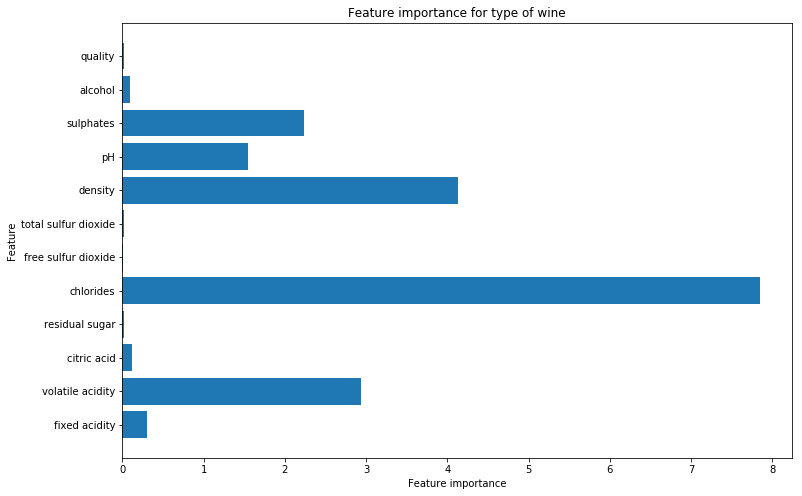

In [61]:
#Plotting the feature importance for linear svc model with c = 100 and l1 penalty.
#n_features = x.shape[1]
#new_names =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol', 'quality']
clf_lsvc = LinearSVC(C=100,loss='squared_hinge',dual=False,random_state=0,penalty='l1').fit(X_train, y_train)
coefs1 = np.abs(clf_lsvc.coef_[0])
#highest = np.argsort(coefs1)
plt.figure(figsize = (12,8))
plt.barh(range(n_features), coefs1, align='center')
plt.yticks(np.arange(n_features), new_names)
plt.title('Feature importance for type of wine')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

# Use multiclass classification to predict the quality of the wine.

In [62]:
#list of classes belonging to wine dataset
sorted(df.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [63]:
x_mul = np.array(df.drop(['quality'],1))
y_mul = np.array(df['quality'])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_mul, y_mul, test_size=0.25, random_state=42)

In [65]:
#Data pre processing scaling input features x
scaler = preprocessing.StandardScaler().fit(x_mul)

In [66]:
x_mul = scaler.transform(x_mul)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
#training the mdel
d_tree = DecisionTreeClassifier(random_state=0)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [69]:
#testing for default value of max_depth
print('the test accuracy for default max_depth parameter is :%.2f' %d_tree.score(X_test,y_test))
print('the train accuracy for default max_depth parameter is :%.2f' %d_tree.score(X_train, y_train))

the test accuracy for default max_depth parameter is :0.60
the train accuracy for default max_depth parameter is :1.00


In [70]:
#Perform some manual optimization of the parameters --> max_depth parameter
training_score6 =[]
testing_score6 = []
max_depth = (2,3,4,5,6)
for i in max_depth:
    d_tree = DecisionTreeClassifier(max_depth=i,random_state=0).fit(X_train, y_train)
    pred_tree = d_tree.predict(X_test)
    training_score6.append(d_tree.score(X_train,y_train))
    testing_score6.append(d_tree.score(X_test,y_test))

In [71]:
print('Test scores:' ,list(zip(max_depth,testing_score6)),'\nTrain scores:', list(zip(max_depth,training_score6)))

Test scores: [(2, 0.5113846153846154), (3, 0.5390769230769231), (4, 0.5286153846153846), (5, 0.544), (6, 0.5476923076923077)] 
Train scores: [(2, 0.5256568144499179), (3, 0.5279146141215106), (4, 0.5543924466338259), (5, 0.5798440065681445), (6, 0.5954433497536946)]


Text(0.5,1,'Accuracy vs max_depth for DecisionTree classifier')

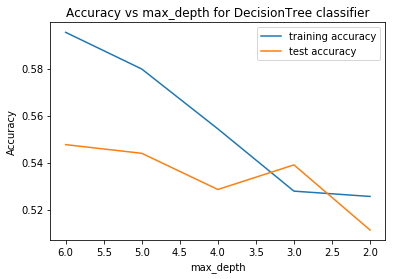

In [72]:
#plot the new obtained accuracy as a function of the chosen parameter
plt.plot(max_depth, training_score6, label="training accuracy")
plt.plot(max_depth, testing_score6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
#plt.xlim(0,10)
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs max_depth for DecisionTree classifier')

In [73]:
#Perform some manual optimization of the parameters (at least 5 different values for the parameter) -->max_leaf_nodes parameter
training_score7 =[]
testing_score7 = []
max_leaf_nodes = (2,4,6,8)
for i in max_leaf_nodes:
    d_tree = DecisionTreeClassifier(max_leaf_nodes=i,random_state=0).fit(X_train, y_train)
    pred_tree = d_tree.predict(X_test)
    training_score7.append(d_tree.score(X_train,y_train))
    testing_score7.append(d_tree.score(X_test,y_test))

In [74]:
print('Test scores:', list(zip(max_leaf_nodes,testing_score7)),'\nTrain scores:', list(zip(max_leaf_nodes,training_score7)))

Test scores: [(2, 0.45292307692307693), (4, 0.5390769230769231), (6, 0.5390769230769231), (8, 0.5378461538461539)] 
Train scores: [(2, 0.47516420361247946), (4, 0.5279146141215106), (6, 0.5279146141215106), (8, 0.5336617405582923)]


Text(0.5,1,'Accuracy vs max_leaf_nodes for DecisionTree classifier')

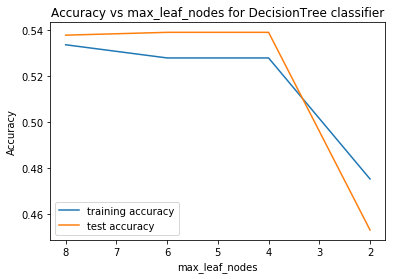

In [75]:
#plot the new obtained accuracy as a function of the chosen parameter
plt.plot(max_leaf_nodes, training_score7, label="training accuracy")
plt.plot(max_leaf_nodes, testing_score7, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_leaf_nodes")
#plt.xlim(0,10)
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs max_leaf_nodes for DecisionTree classifier')

In [76]:
#! pip install graphviz

In [77]:
#from sklearn.tree import export_graphviz

#names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol', 'type']

#export_graphviz(d_tree, out_file="tree.dot", class_names=['3', '4', '5', '6', '7', '8', '9'],
#feature_names=names, impurity=False, filled=True)

In [78]:
#import graphviz
#with open('tree.dot') as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

Text(0,0.5,'Feature')

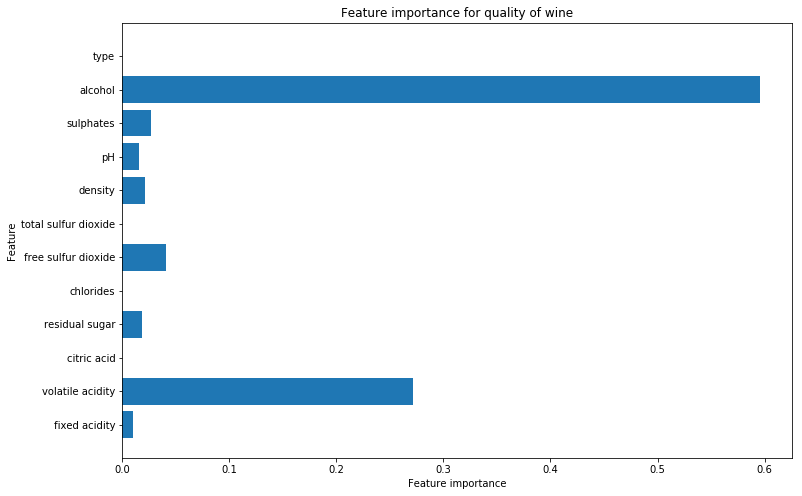

In [79]:
#plotting feature importance for decisiontree classifier for wine quality with max_depth 4
n_features = x_mul.shape[1]
new_names1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']
F_imp = DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train, y_train).feature_importances_
#highest = np.argsort(F_imp)
plt.figure(figsize = (12,8))
plt.barh(range(n_features), F_imp, align='center')
plt.yticks(np.arange(n_features), new_names1)
plt.title('Feature importance for quality of wine')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

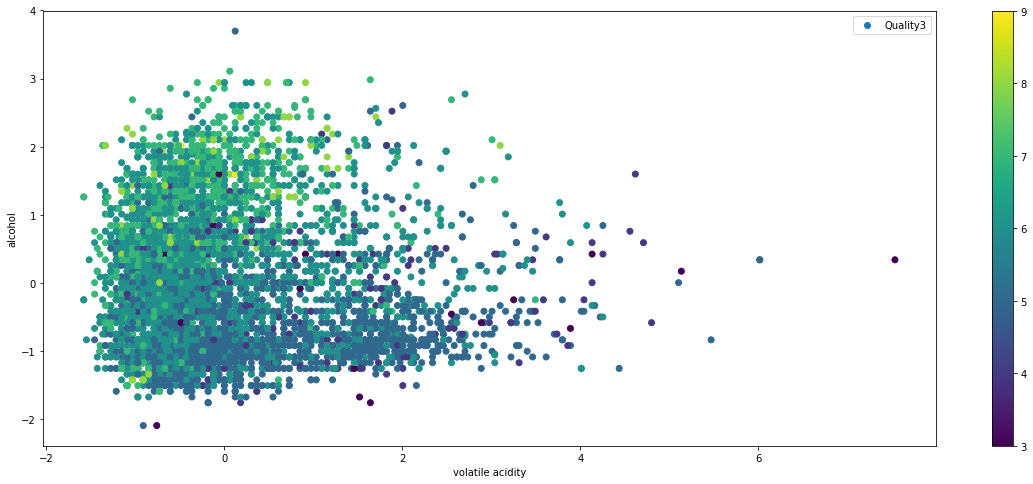

In [80]:
#scatter plot showing quality of wine against two important features.
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']
n,m = 1,10
plt.figure(figsize=(20,8))
plt.scatter(x_mul[:, n], x_mul[:, m], c = y_mul, alpha=1.0)
plt.xlabel(features[n])
plt.ylabel(features[m])
plt.legend(["Quality3", "Quality4", "Quality5", "Quality6", "Quality7" , "Quality8", "Quality9"])
plt.colorbar()

# 2. GradientBoostingClassifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
#training the model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [83]:
#testing for default value of max_depth and learning_rate
print('the test accuracy for default  parameters is :%.2f' %gbrt.score(X_test,y_test))
print('the train accuracy for default parameters is :%.2f' %gbrt.score(X_train, y_train))

the test accuracy for default  parameters is :0.59
the train accuracy for default parameters is :0.71


In [84]:
#Perform some manual optimization of the parameters (at least 5 different values for the parameter) --> max_depth parameter
training_score8 =[]
testing_score8 = []
max_depth = (1,2,4,5,6)
for i in max_depth:
    gbrt = GradientBoostingClassifier(max_depth=i,random_state=0).fit(X_train, y_train)
    pred_gbrt = gbrt.predict(X_test)
    training_score8.append(gbrt.score(X_train,y_train))
    testing_score8.append(gbrt.score(X_test,y_test))

In [85]:
print('Test scores:', list(zip(max_depth,testing_score8)),'\nTrain scores:', list(zip(max_depth,training_score8)))

Test scores: [(1, 0.544), (2, 0.5593846153846154), (4, 0.6178461538461538), (5, 0.6387692307692308), (6, 0.6621538461538462)] 
Train scores: [(1, 0.5638341543513957), (2, 0.6231527093596059), (4, 0.8134236453201971), (5, 0.9037356321839081), (6, 0.9722906403940886)]


Text(0.5,1,'Accuracy vs max_depth for GradientBoostingClassifier')

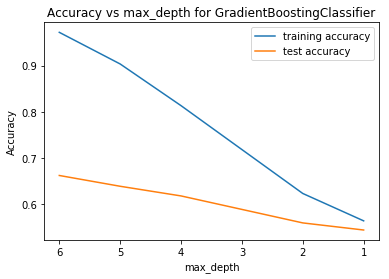

In [86]:
#plot the new obtained accuracy as a function of the chosen parameter
plt.plot(max_depth, training_score8, label="training accuracy")
plt.plot(max_depth, testing_score8, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
#plt.xlim(0,10)
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs max_depth for GradientBoostingClassifier')

Text(0.5,0,'Feature importance')

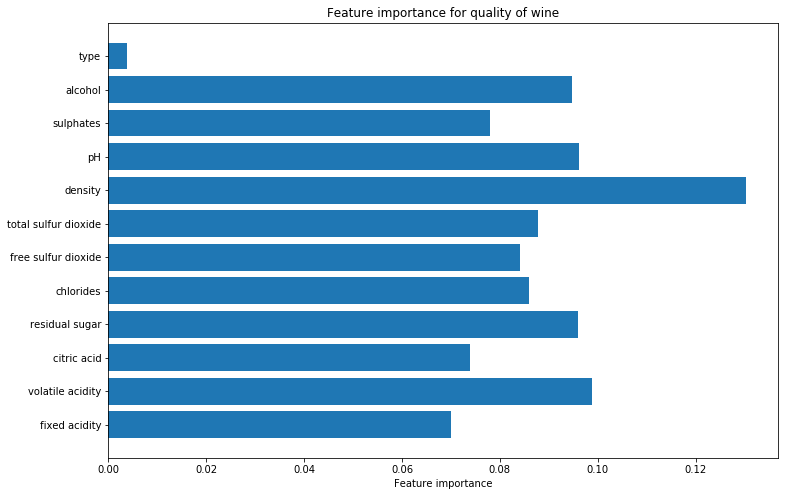

In [87]:
#plotting the feature importance with max_depth = 4
n_features = x_mul.shape[1]
new_names1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']
F_gbrt = GradientBoostingClassifier(max_depth=4,random_state=0).fit(X_train, y_train).feature_importances_
#highest = np.argsort(F_imp)
plt.figure(figsize = (12,8))
plt.barh(range(n_features), F_gbrt, align='center')
plt.yticks(np.arange(n_features), new_names1)
plt.title('Feature importance for quality of wine')
plt.xlabel("Feature importance")

In [88]:
#Perform some manual optimization of the parameters (at least 5 different values for the parameter) --> learning_rate parameter
training_score9 =[]
testing_score9 = []
learning_rate = (0.001,0.01,0.5,1.0)
for i in learning_rate:
    gbrt = GradientBoostingClassifier(learning_rate=i,random_state=0).fit(X_train, y_train)
    pred_gbrt = gbrt.predict(X_test)
    training_score9.append(gbrt.score(X_train,y_train))
    testing_score9.append(gbrt.score(X_test,y_test))

In [89]:
print('Test scores:', list(zip(learning_rate,testing_score9)),'\nTrain scores:', list(zip(learning_rate,training_score9)))

Test scores: [(0.001, 0.5403076923076923), (0.01, 0.5446153846153846), (0.5, 0.6049230769230769), (1.0, 0.5932307692307692)] 
Train scores: [(0.001, 0.5311986863711001), (0.01, 0.576559934318555), (0.5, 0.8528325123152709), (1.0, 0.8152709359605911)]


Text(0.5,1,'Accuracy vs learning_rate for GradientBoostingClassifier')

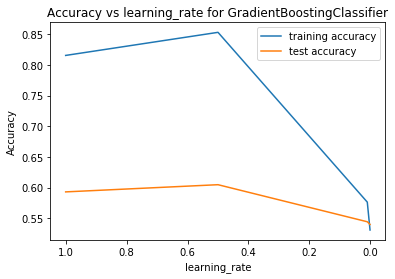

In [90]:
#plot the new obtained accuracy as a function of the chosen parameter
plt.plot(learning_rate, training_score9, label="training accuracy")
plt.plot(learning_rate, testing_score9, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
#plt.xlim(0,10)
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy vs learning_rate for GradientBoostingClassifier')

Text(0.5,0,'Feature importance')

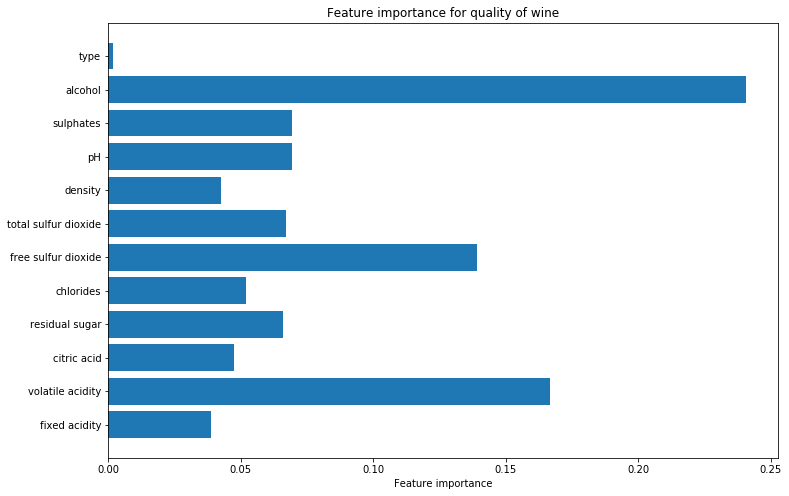

In [93]:
#plotting the feature importance of wine quality with learning rate 0.01 and max_depth = 4
n_features = x_mul.shape[1]
new_names1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']
F_gbrt = GradientBoostingClassifier(max_depth=4,learning_rate=0.01,random_state=0).fit(X_train, y_train).feature_importances_
#highest = np.argsort(F_imp)
plt.figure(figsize = (12,8))
plt.barh(range(n_features), F_gbrt, align='center')
plt.yticks(np.arange(n_features), new_names1)
plt.title('Feature importance for quality of wine')
plt.xlabel("Feature importance")